# Timeseries

This notebook shows how to use the timeseries diagnostic. Here we focus on the `Timeseries` for the single model evaluation and the `PlotTimeseries` for the multi model plots.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.timeseries import Timeseries

/LUMI_TYKKY_e0MDUMK/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We set the `Timeseries` for a model and ERA5, with two different class instances.

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [4]:
ts_dataset = Timeseries(**dataset_dict, **common_dict)

2025-08-28 13:31:35 :: Timeseries :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


In [5]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [6]:
ts_dataset.run(**run_dict)

2025-08-28 13:31:38 :: Timeseries :: INFO     -> Running Timeseries for 2t


2025-08-28 13:31:38 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-08-28 13:31:38 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-08-28 13:31:38 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-08-28 13:31:38 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-08-28 13:31:39 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-08-28 13:31:39 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-08-28 13:31:39 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-08-28 13:32:35 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-08-28 13:32:35 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-08-28 13:32:35 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-08-28 13:32:35 :: Regridder :: INFO    

In [7]:
ts_obs = Timeseries(**obs_dict, **common_dict)
ts_obs.run(**run_dict, std=True)

2025-08-28 13:32:42 :: Timeseries :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-08-28 13:32:42 :: Timeseries :: INFO     -> Running Timeseries for 2t


2025-08-28 13:32:42 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!
2025-08-28 13:32:42 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-08-28 13:32:42 :: Fixer :: INFO     -> Fix names in metadata is ERA5-destine-v1
2025-08-28 13:32:42 :: Fixer :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2025-08-28 13:32:42 :: Reader :: INFO     -> Grid metadata is era5-r025s
2025-08-28 13:32:42 :: Regridder :: INFO     -> Grid name: era5-r025s
2025-08-28 13:32:42 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_era5-r025s.nc.
2025-08-28 13:32:42 :: CoordTransator :: INFO     -> Grid type: Regular
2025-08-28 13:32:42 :: CoordTransator :: INFO     -> Target data model: aqua
2025-08-28 13:32:42 :: CoordTransator :: INFO     -> Loading data model from /users/mattnuri/.aqua/data_model/aqua.yaml
2025-08-28 13:32:42 :: CoordTransator :: INFO     -> Analysing coordinate: latit

In [8]:
from aqua.diagnostics.timeseries import PlotTimeseries

In [9]:
ts_obs.monthly

<xarray.DataArray '2t' (time: 120)> Size: 960B
dask.array<where, shape=(120,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 960B 1990-01-16T12:00:00 ... 1999-12-16T12...
Attributes: (12/24)
    long_name:           2 metre temperature
    units:               degC
    code:                167
    table:               128
    history:             \n2025-06-19 11:35:35 AQUA💧: Variable renamed 2t fro...
    paramId:             167
    ...                  ...
    exp:                 era5
    var:                 2t
    freq:                monthly
    region:              None
    timestamp:           2025-06-19 11:35:36
    aqua_version:        0.16.0-alpha

In [9]:
plot_dict = {'monthly_data': ts_dataset.monthly,
             'annual_data': ts_dataset.annual,
             'ref_monthly_data': ts_obs.monthly,
             'ref_annual_data': ts_obs.annual,
             'std_monthly_data': ts_obs.std_monthly,
             'std_annual_data': ts_obs.std_annual,
             'loglevel': 'INFO'}

2025-08-28 13:37:28 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-28 13:37:28 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.r1.obs.ERA5.era5.2t.png
2025-08-28 13:37:28 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.r1.obs.ERA5.era5.2t.png


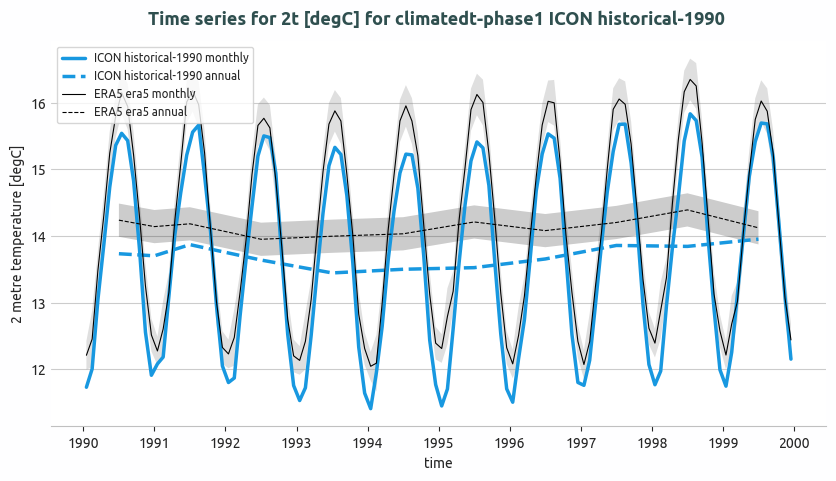

In [14]:
plot = PlotTimeseries(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title()
fig, _ = plot.plot_timeseries(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, description=desc)